In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
import seaborn as sns
from matplotlib.pyplot import figure


In [3]:
#Check the current working directory to see the file path/location
#os.getcwd()

In [4]:
#Import the data
train = pd.read_csv('/Users/ryansmith/Desktop/School/STA 160/STA_160_Final_project/Python/train.csv')
unique_m = pd.read_csv("/Users/ryansmith/Desktop/School/STA 160/STA_160_Final_project/Python/unique_m.csv")

In [17]:
train_red = train.drop(columns = 'critical_temp')
data_full = train_red.combine(unique_m.drop(columns = 'material'), np.minimum)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84


In [4]:
train_red = train[['number_of_elements', 'mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 'mean_Density',
                 'mean_ElectronAffinity', 'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence',
                  'critical_temp']]

In [5]:
unique_m.corr().round(2)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
H,1.00,NaN,0.01,-0.00,-0.01,0.16,0.08,-0.02,-0.00,NaN,...,-0.01,-0.00,-0.01,-0.01,-0.01,-0.02,NaN,NaN,NaN,-0.03
He,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Li,0.01,NaN,1.00,-0.00,0.04,0.01,0.06,-0.04,-0.01,NaN,...,0.08,-0.00,-0.01,-0.02,-0.01,-0.02,NaN,NaN,NaN,-0.05
Be,-0.00,NaN,-0.00,1.00,-0.00,-0.00,-0.00,-0.03,-0.00,NaN,...,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,NaN,NaN,NaN,-0.03
B,-0.01,NaN,0.04,-0.00,1.00,-0.00,0.00,-0.10,-0.01,NaN,...,0.01,-0.00,-0.02,-0.02,-0.02,-0.04,NaN,NaN,NaN,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bi,-0.02,NaN,-0.02,-0.01,-0.04,-0.03,-0.02,0.17,0.03,NaN,...,-0.03,-0.01,-0.05,-0.05,0.07,1.00,NaN,NaN,NaN,0.16
Po,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_corr = train.corr().round(2)
c_temp_corr = train_corr[['critical_temp']]
#train_corr.sort_values('critical_temp',ascending=False)
c_temp_corr = c_temp_corr.sort_values('critical_temp', ascending = False)

c_temp_corr.head(20)
## 'number_of_elements', 'wtd_entropy_atomic_radius', 'wtd_std_atomic_radius', 'entropy_Valence', 'range_fie',
#    'wtf_entropy_atmoic_mass', 'range_atomic_radius', 'std_ThermalConductivity', 'range_ThermalConductivity',
#    'wtd_std_ThermalConductivity', 'critical_temp'       all had above 0.6 correlation with critical temp 

#c_temp_corr.tail(20)
###'mean_Valence', 'wtd_gmean_Valence', 'wtd_mean_Valence'   all had above 0.6 absolute correlation with critical temp

###Vars with above abs 0.6 corr
train_important = train[['number_of_elements', 'wtd_entropy_atomic_radius', 'wtd_std_atomic_radius', 
    'entropy_Valence', 'range_fie', 'wtd_entropy_atomic_mass', 'range_atomic_radius', 'std_ThermalConductivity',
    'range_ThermalConductivity',  'wtd_std_ThermalConductivity', 'critical_temp', 'mean_Valence', 
    'wtd_gmean_Valence', 'wtd_mean_Valence' ]]



#Removing highly correlated variables....
train_important.corr()


#train[['wtd_mean_Valence', 'wtd_gmean_Valence']].corr()

,number_of_elements,wtd_entropy_atomic_radius,wtd_std_atomic_radius,entropy_Valence,range_fie,wtd_entropy_atomic_mass,range_atomic_radius,std_ThermalConductivity,range_ThermalConductivity,wtd_std_ThermalConductivity,critical_temp,mean_Valence,wtd_gmean_Valence,wtd_mean_Valence
number_of_elements,1.000000,0.904121,0.695089,0.967832,0.781227,0.881845,0.768060,0.602018,0.696060,0.665580,0.601069,-0.609412,-0.659268,-0.648551
wtd_entropy_atomic_radius,0.904121,1.000000,0.781488,0.919184,0.797663,0.961464,0.812398,0.621078,0.690578,0.675969,0.603494,-0.623502,-0.677313,-0.660216
wtd_std_atomic_radius,0.695089,0.781488,1.000000,0.738201,0.871711,0.737633,0.958004,0.694161,0.722588,0.713796,0.599199,-0.713816,-0.736105,-0.733805
entropy_Valence,0.967832,0.919184,0.738201,1.000000,0.782544,0.897636,0.796085,0.641505,0.718955,0.691772,0.598591,-0.619428,-0.656235,-0.652105
range_fie,0.781227,0.797663,0.871711,0.782544,1.000000,0.744625,0.908734,0.642073,0.683591,0.670738,0.600790,-0.740985,-0.746731,-0.731329
wtd_entropy_atomic_mass,0.881845,0.961464,0.737633,0.897636,0.744625,1.000000,0.774054,0.618855,0.688968,0.684497,0.626930,-0.583784,-0.650247,-0.644336
range_atomic_radius,0.768060,0.812398,0.958004,0.796085,0.908734,0.774054,1.000000,0.697465,0.736137,0.736142,0.653759,-0.759162,-0.761772,-0.756621
std_ThermalConductivity,0.602018,0.621078,0.694161,0.641505,0.642073,0.618855,0.697465,1.000000,0.987867,0.955627,0.653632,-0.671569,-0.695269,-0.714405
range_ThermalConductivity,0.696060,0.690578,0.722588,0.718955,0.683591,0.688968,0.736137,0.987867,1.000000,0.965449,0.687654,-0.693196,-0.725721,-0.743370
wtd_std_ThermalConductivity,0.665580,0.675969,0.713796,0.691772,0.670738,0.684497,0.736142,0.955627,0.965449,1.000000,0.721271,-0.678028,-0.715135,-0.735073


In [7]:
####Exploratory
#sns.pairplot(train)

In [8]:
train_red.describe()

,number_of_elements,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,769.614748,157.983101,6111.465214,76.879751,14.296113,89.706911,3.198228,34.421219
std,1.439295,29.676497,87.488694,20.147288,2846.785185,27.701890,11.300188,38.517485,1.044611,34.254362
min,1.000000,6.941000,375.500000,48.000000,1.429000,1.500000,0.222000,0.026580,1.000000,0.000210
25%,3.000000,72.458076,723.740000,149.333333,4513.500000,62.090000,7.588667,61.000000,2.333333,5.365000
50%,4.000000,84.922750,764.900000,160.250000,5329.085800,73.100000,9.304400,96.504430,2.833333,20.000000
75%,5.000000,100.404410,796.320000,169.857143,6728.000000,85.504167,17.114444,111.005316,4.000000,63.000000
max,9.000000,208.980400,1313.100000,298.000000,22590.000000,326.100000,105.000000,332.500000,7.000000,185.000000


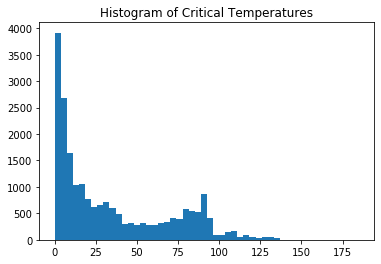

In [9]:
plt.hist(np.asarray(train[['critical_temp']]), bins=50)
plt.title("Histogram of Critical Temperatures")
plt.show()

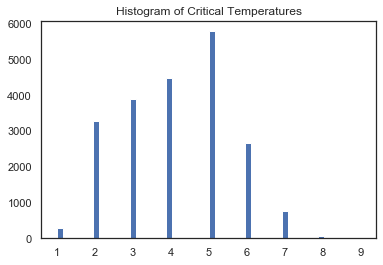

In [32]:
plt.hist(np.asarray(train[['number_of_elements']]), bins=50)
plt.title("Histogram of Critical Temperatures")
plt.show()

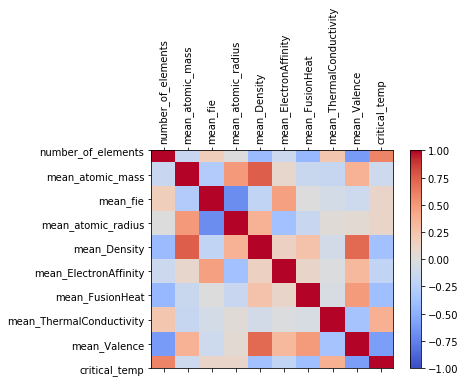

In [10]:
corr = train_red.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_red.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_red.columns)
ax.set_yticklabels(train_red.columns)
plt.show()

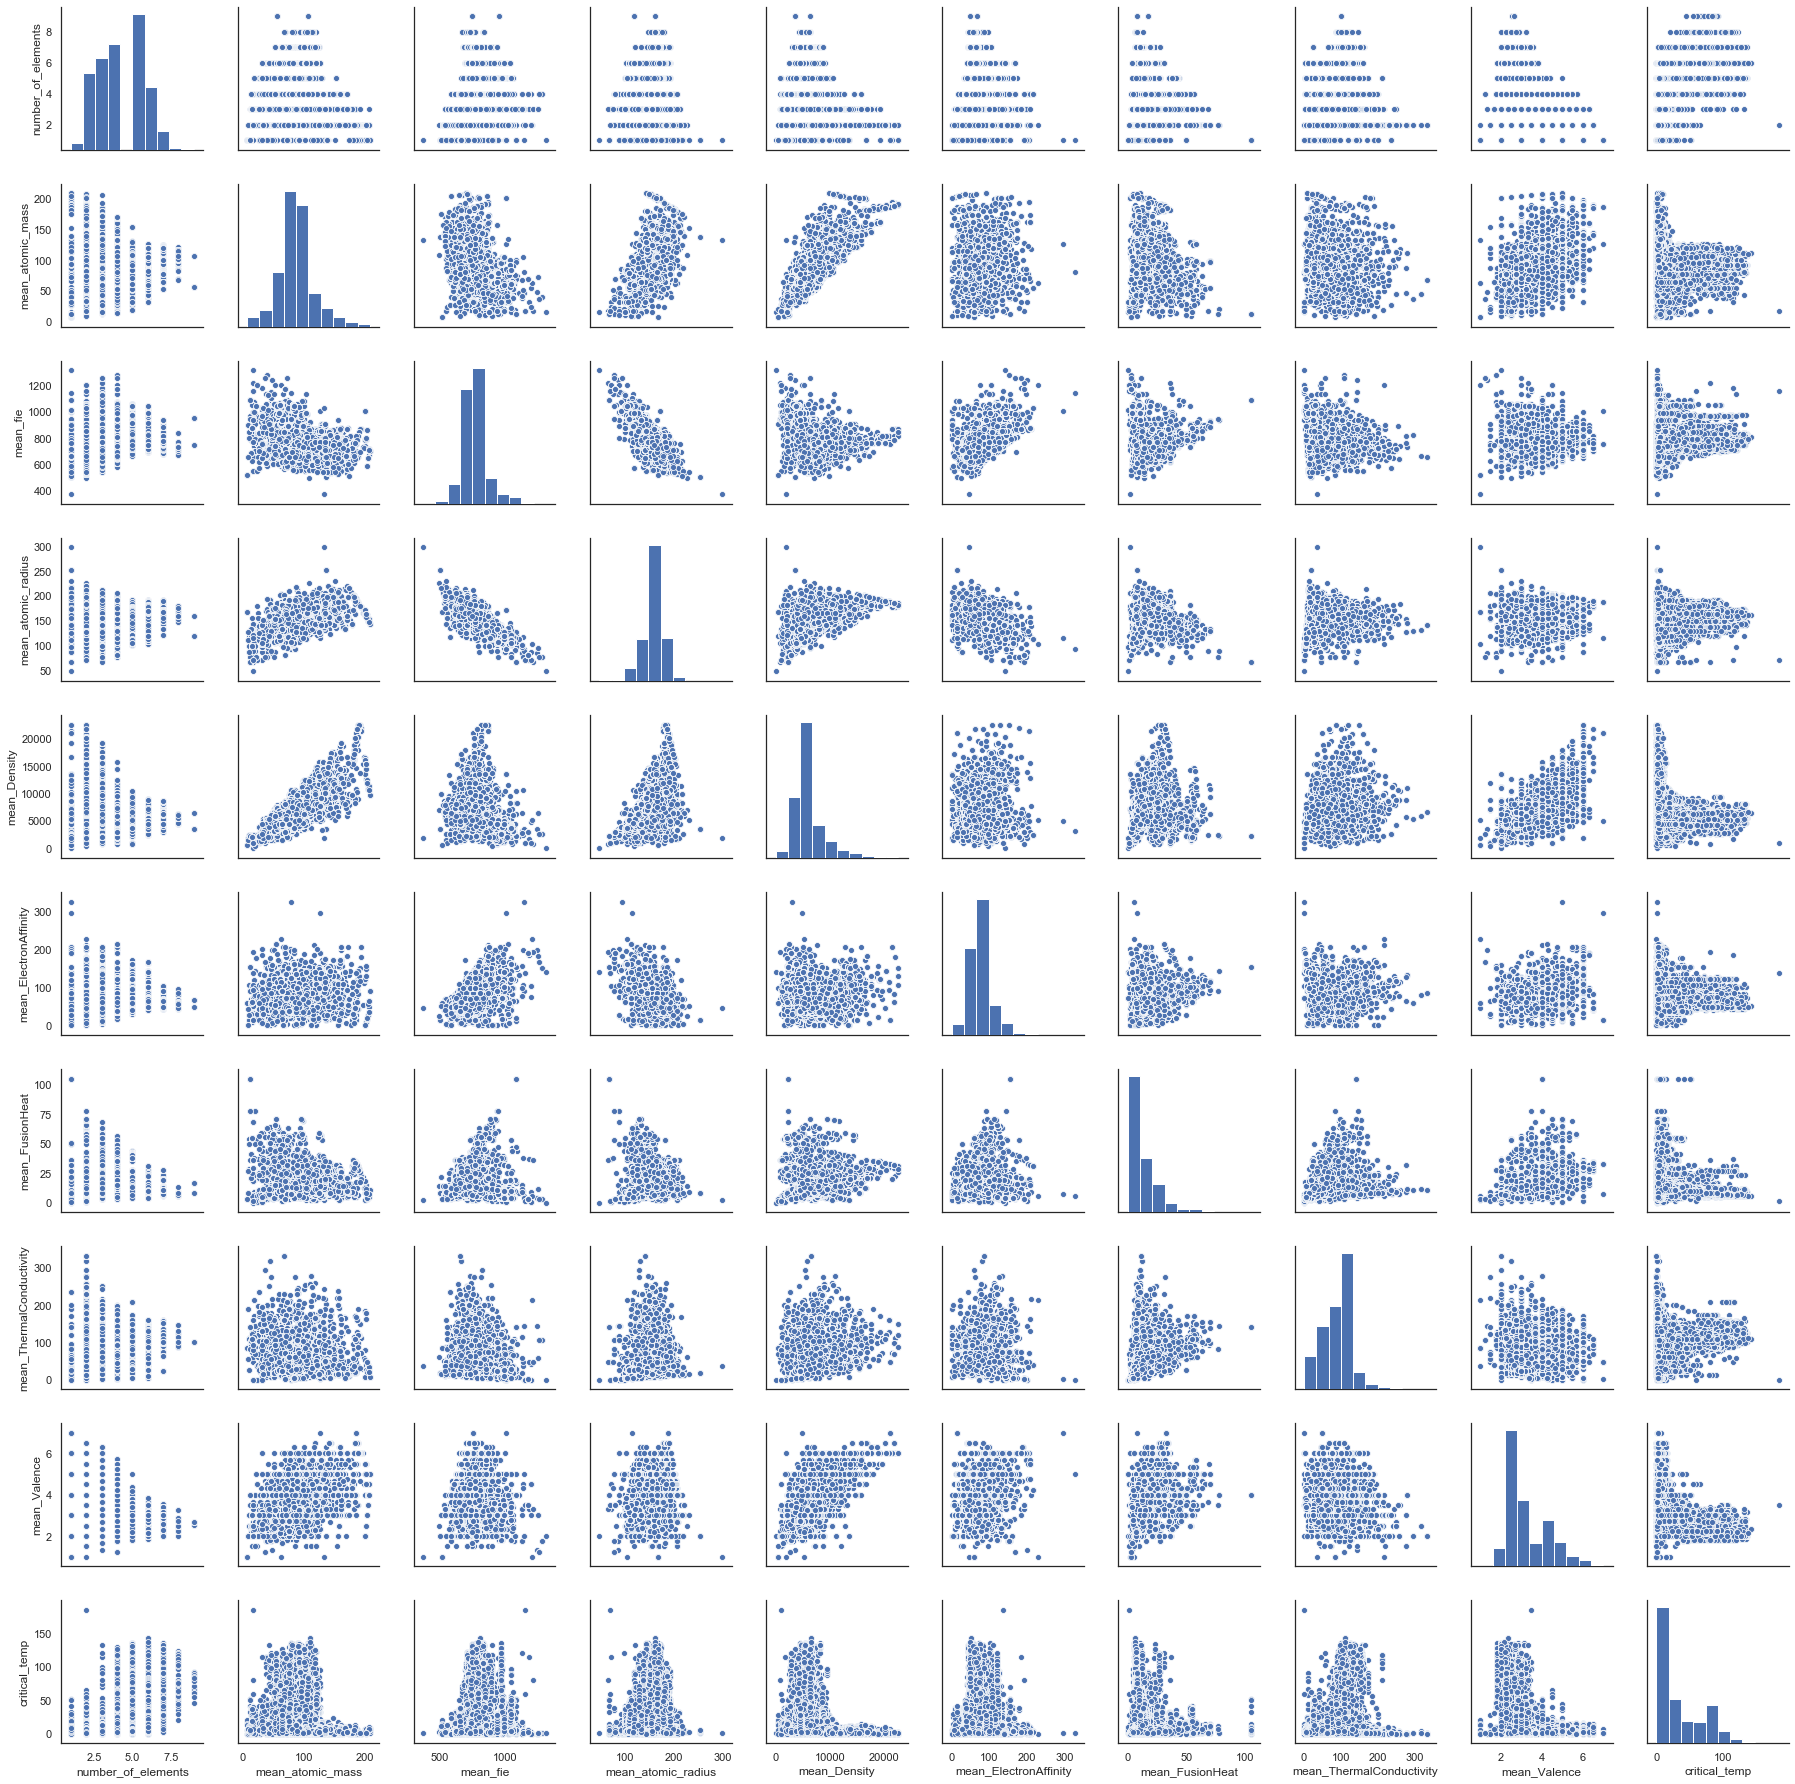

In [11]:
sns.set(style="white")


pairplot = sns.pairplot(train_red)

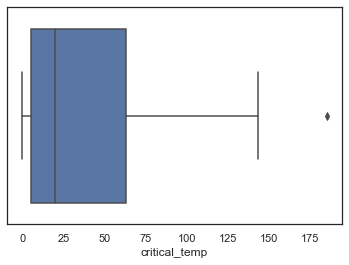

In [12]:
sns.boxplot(x=train['critical_temp'])

In [13]:
train
train_outlier = train.loc[train['critical_temp'] < 100]
train.shape[0] - train_outlier.shape[0]



802

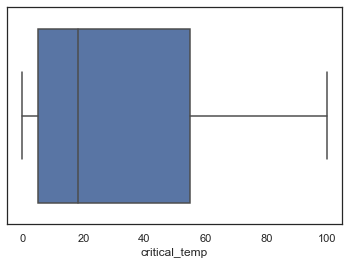

In [14]:
import seaborn as sns
sns.boxplot(x=train_outlier['critical_temp'])

In [15]:
#list(train.columns) 

In [16]:
##Shuffle the indexes and split the data into a 70/30 training/test data split.
shuffle = train_red.sample(frac = 1)
training = shuffle[:int(0.7 * len(train.index))]
test = shuffle[int(0.7 * len(train.index)):]

In [17]:
##Split the data frame into the design matrix(X) and the variable we are predicting(y- critical_temp).
##Note: X/y is training, X_new/y_new are the testing data.
X = training[['number_of_elements', 'mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 'mean_Density',
                 'mean_ElectronAffinity', 'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence']]
X_new = test[['number_of_elements', 'mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 'mean_Density',
                 'mean_ElectronAffinity', 'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence']]
y_new = test[['critical_temp']]
y = training[['critical_temp']]

In [18]:
##PAGE 119 SKILEARN book. Basical linear regression model.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_ 
predictions = lin_reg.predict(X_new)
predictions

predictions

train_lin_MSE = (1 / len(predictions)) * np.sum((y_new - predictions) ** 2)

train_lin_RMSE = (train_lin_MSE) ** (1/2)
train_lin_RMSE
###The RMSE is 23.17 for the linear regression model, which is not good.

critical_temp    22.940862
dtype: float64

In [19]:
####RANDOM FOREST TO PREDICT the critical temperature.
labels = np.array(training['critical_temp'])
features = np.array(X)
test_features = np.array(X_new)
test_labels = np.array(test['critical_temp'])

In [20]:
from sklearn.ensemble import RandomForestRegressor
# 1000 trees...
rf = RandomForestRegressor(n_estimators = 1000, random_state = 25)
# Train the model on training data
rf.fit(features, labels)


predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 8.19 degrees.


In [21]:
train_rf_MSE = (1 / len(predictions)) * np.sum((test_labels - predictions) ** 2)
train_rf_RMSE = (train_rf_MSE) ** (1/2)
train_rf_RMSE
##The RMSE is 13.531 for the random forest prediciton, which is significantly better than the 
#.    linear regression model.

13.531036961438753

In [22]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


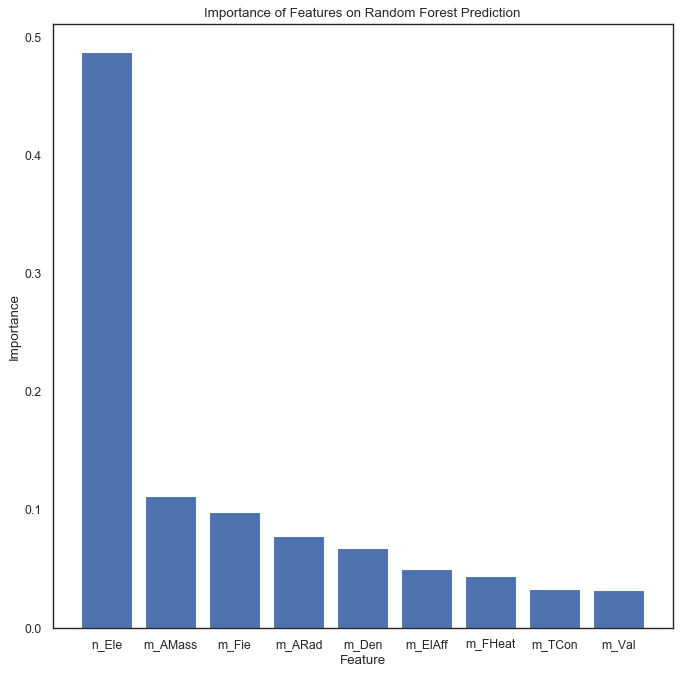

In [23]:
xnames = ['n_Ele', 'm_AMass', 'm_Fie', 'm_ARad', 'm_Den', 'm_ElAff', 'm_FHeat', 'm_TCon', 'm_Val']
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.bar(xnames, feature_importances['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importance of Features on Random Forest Prediction')
plt.show()

In [ ]:
##From this we can see that the features that affect the critical temperature the most are number of elements,
#.  mean atomic mass, mean fie.

In [24]:
####REDO RANDOM FOREST TO PREDICT the critical temperature. WITH CLEAN DATA
data = data_full[["number_of_elements" ,"wtd_gmean_atomic_mass" ,"wtd_entropy_atomic_mass", "wtd_range_atomic_mass" ,       
"wtd_std_atomic_mass","wtd_mean_fie"   ,"wtd_entropy_fie" ,"wtd_range_fie","wtd_std_fie", "wtd_mean_atomic_radius",      
"range_atomic_radius" ,"wtd_range_atomic_radius","std_atomic_radius", "wtd_std_atomic_radius" , "mean_Density" ,               
"wtd_gmean_Density", "entropy_Density" , "wtd_entropy_Density" ,"range_Density" ,"wtd_range_Density",
    "wtd_std_Density", "gmean_ElectronAffinity", "entropy_ElectronAffinity", "wtd_entropy_ElectronAffinity",
"range_ElectronAffinity" , "std_ElectronAffinity" , "wtd_std_ElectronAffinity", "mean_FusionHeat" ,
"wtd_mean_FusionHeat", "gmean_FusionHeat", "wtd_gmean_FusionHeat" ,"entropy_FusionHeat","wtd_entropy_FusionHeat",   "wtd_range_FusionHeat" ,"std_FusionHeat",              
 "mean_ThermalConductivity" ,"wtd_mean_ThermalConductivity" , "gmean_ThermalConductivity" , 
"wtd_gmean_ThermalConductivity", "range_ThermalConductivity", "wtd_range_ThermalConductivity",
"std_ThermalConductivity", "wtd_std_ThermalConductivity" ,"mean_Valence" , "wtd_mean_Valence" ,"gmean_Valence" ,
"wtd_gmean_Valence" ,  "entropy_Valence", "wtd_entropy_Valence","wtd_range_Valence","std_Valence" ,
"wtd_std_Valence", "O", "Ca" , "Cu",  "Sr","Y", "Ba" , "Hg",  "critical_temp" ]]

##Shuffle the indexes and split the data into a 70/30 training/test data split.
shuffle = train_red.sample(frac = 1)
training = shuffle[:int(0.7 * len(train.index))]
test = shuffle[int(0.7 * len(train.index)):]

train_data = data[training,]
test_data = data[test,]



##Split the data frame into the design matrix(X) and the variable we are predicting(y- critical_temp).
##Note: X/y is training, X_new/y_new are the testing data.
X = train_data[[-'critical_temp']]
X_new = test_data[[-'critical_temp']]
y_new = test_data[['critical_temp']]
y = train_data[['critical_temp']]



labels = np.array(y)
features = np.array([X])
test_features = np.array(X_new)
test_labels = np.array(y_new)

TypeError: '(       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
717                     5         82.325340             53.410242   
11089                   4         79.814000             88.357900   
6676                    5         78.679650             47.926485   
7885                    6         84.188275             60.200957   
1528                    5        100.561774             58.657975   
...                   ...               ...                   ...   
3995                    5         69.171250             52.921468   
16943                   3         42.674127             32.459345   
18399                   4        105.313925             76.633000   
20498                   6         94.218112             86.590226   
1369                    5         69.171250             49.488073   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
717            59.241947              34.265195             1.318401   
11089          35.329151              36.175626             0.865067   
6676           64.164718              33.958577             1.462708   
7885           63.624275              36.706457             1.545960   
1528           77.821240              36.320476             1.440789   
...                  ...                    ...                  ...   
3995           54.872765              36.524851             1.419173   
16943          29.009195              19.802952             0.756830   
18399          73.088376              42.605417             1.125848   
20498          59.083772              55.631957             1.442692   
1369           54.872765              34.384301             1.419173   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
717                   1.475424          188.38390              17.295295   
11089                 0.683105          188.14300              66.477567   
6676                  1.468544          121.32760              13.791280   
7885                  1.439521          192.98100              26.085936   
1528                  1.458930          128.24260              16.573214   
...                        ...                ...                    ...   
3995                  1.312082          121.32760              21.852485   
16943                 0.746746           82.09538              21.201178   
18399                 1.158646          188.38390              31.383691   
20498                 1.363045          192.98100              40.196140   
1369                  1.303482          121.32760              18.123236   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
717          65.517648  ...      2.200000          2.105263       2.168944   
11089        77.567616  ...      3.500000          3.533333       2.912951   
6676         39.450875  ...      2.200000          2.066667       2.168944   
7885         61.412064  ...      2.666667          2.420000       2.492883   
1528         51.891619  ...      2.800000          2.307143       2.701920   
...                ...  ...           ...               ...            ...   
3995         41.809011  ...      2.200000          2.057500       2.168944   
16943        35.944230  ...      3.333333          3.416667       3.107233   
18399        71.695924  ...      2.250000          2.181818       2.213364   
20498        75.231238  ...      3.333333          4.300000       2.853639   
1369         41.809011  ...      2.200000          2.062000       2.168944   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
717             2.087209         1.594167             1.376227              1   
11089           2.768102         1.239659             1.109752              5   
6676            2.054799         1.594167             1.256409              1   
7885            2.278298         1.717076             1.419535              3   
1528            2.259535         1.574097             1.334120              2   
...                  ...              ...                  ...            ...   
3995            2.047176         1.594167             1.289660              1   
16943           3.295408         1.029653             0.828686              3   
18399           2.153013         1.368922             1.198849              1   
20498           3.772087         1.656947             1.254902              5   
1369            2.050915         1.594167             1.196695              1   

       wtd_range_Valence  std_Valence  wtd_std_Valence  
717             0.842105     0.400000         0.306892  
11089           1.766667     1.802776         2.085399  
6676            0.994667     0.400000         0.249444  
7885            1.006667     1.105542         1.021567  
1528            1.057143     0.748331         0.505632  
...                  ...          ...              ...  
3995            0.948333     0.400000         0.232796  
16943           1.833333     1.247219         0.953794  
18399           0.909091     0.433013         0.385695  
20498           2.300000     1.699673         1.791647  
1369            1.057333     0.400000         0.241156  

[14884 rows x 81 columns],)' is an invalid key

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# 1000 trees...
rf = RandomForestRegressor(n_estimators = 1000, random_state = 25)
# Train the model on training data
rf.fit(features, labels)


predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
train_rf_MSE = (1 / len(predictions)) * np.sum((test_labels - predictions) ** 2)
train_rf_RMSE = (train_rf_MSE) ** (1/2)
train_rf_RMSE
##The RMSE is 13.531 for the random forest prediciton, which is significantly better than the 
#.    linear regression model.